In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# =======================
# 1. 读入数据
# =======================
jap = pd.read_csv("jap_vlaue_tax.csv", sep=",")
mex = pd.read_csv("mex_value_tax.csv", sep=",", header=None)

# =======================
# 2. 统一列名
# =======================
mex.columns = ["Country", "Year", "Month", "value", "tariff", "cov19"]
jap = jap.rename(columns={
    "General Customs Value": "value",
    "Real Tariff": "tariff"
})

# =======================
# 3. 只保留日本数据
# =======================
df = jap.copy()

#只保留2022以后
# df = df[df["Year"] >= 2022]

# 添加 ln(1 + tariff)
df["ln_tariff"] = np.log(1 + df["tariff"])

# =======================
# 4. 生成滞后项 ln(value)
# =======================
df["ln_value"] = np.log(df["value"])
df["ln_value_lag"] = df.groupby("Country")["ln_value"].shift(1)

# 删除滞后后产生的 NaN
df = df.dropna()

# =======================
# 5. 回归模型
# y = α + ρ*y_{t-1} + β ln(1+tariff) + γ cov19
# =======================
model = smf.ols("ln_value ~ ln_value_lag + ln_tariff + cov19 ", data=df).fit()
print(model.summary())

# 拿到参数
alpha = model.params["Intercept"]
rho = model.params["ln_value_lag"]
beta = model.params["ln_tariff"]

# print("\n参数：", alpha, rho, beta, gamma)

# =======================
# 6. 预测 2025年1月的 ln(value)
# =======================

# 取 2024年12月 作为滞后项
last = df[df["Year"]==2024].sort_values("Month").iloc[-1]
ln_value_last = last["ln_value"]

# 取 2025.01 的关税（若没有你需要自己填写或假设不变）
tariff_2025_01 = last["tariff"]   # 假设不变
ln_tariff_2025_01 = np.log(1 + tariff_2025_01)

# 计算 ln(value_2025_01)
ln_val_2025_01 = alpha + rho * ln_value_last + beta * ln_tariff_2025_01

# 转回 trade total 值
val_2025_01 = np.exp(ln_val_2025_01)

print("\n预测 2025年1月 日本总出口额（value）为：", val_2025_01)


                            OLS Regression Results                            
Dep. Variable:               ln_value   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     16.58
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           8.53e-08
Time:                        22:02:12   Log-Likelihood:                 12.327
No. Observations:                  59   AIC:                            -16.65
Df Residuals:                      55   BIC:                            -8.344
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.5451      2.459      5.102   

In [2]:
# OLS Regression Results                            
# ==============================================================================
# Dep. Variable:               ln_value   R-squared:                       0.494
# Model:                            OLS   Adj. R-squared:                  0.446
# Method:                 Least Squares   F-statistic:                     10.35
# Date:                Sun, 23 Nov 2025   Prob (F-statistic):           5.84e-07
# Time:                        21:32:45   Log-Likelihood:                 13.418
# No. Observations:                  59   AIC:                            -14.84
# Df Residuals:                      53   BIC:                            -2.372
# Df Model:                           5                                         
# Covariance Type:            nonrobust                                         
# ======================================================================================
#                          coef    std err          t      P>|t|      [0.025      0.975]
# --------------------------------------------------------------------------------------
# Intercept             18.7627      6.210      3.022      0.004       6.308      31.218
# ln_value_lag           0.1658      0.282      0.589      0.558      -0.399       0.731
# ln_tariff            -22.9706     23.194     -0.990      0.326     -69.491      23.550
# cov19                 -7.0684      6.768     -1.044      0.301     -20.643       6.506
# cov19:ln_tariff      -23.5036     30.022     -0.783      0.437     -83.721      36.714
# cov19:ln_value_lag     0.3407      0.306      1.114      0.270      -0.273       0.954
# ==============================================================================
# Omnibus:                        9.806   Durbin-Watson:                   1.923
# Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.164
# Skew:                          -0.753   Prob(JB):                      0.00621
# Kurtosis:                       4.365   Cond. No.                     3.49e+04

#make R-squared greater than 0.66



In [3]:
# prediction based on final_fit
print(final_fit.summary())

NameError: name 'final_fit' is not defined

In [4]:
# predict based on below fact
#                             OLS Regression Results                            
# ==============================================================================
# Dep. Variable:               ln_value   R-squared:                       0.788
# Model:                            OLS   Adj. R-squared:                  0.660
# Method:                 Least Squares   F-statistic:                     6.181
# Date:                Sun, 23 Nov 2025   Prob (F-statistic):           1.29e-06
# Time:                        20:42:44   Log-Likelihood:                 36.869
# No. Observations:                  57   AIC:                            -29.74
# Df Residuals:                      35   BIC:                             15.21
# Df Model:                          21                                         
# Covariance Type:            nonrobust                                         
# ===================================================================================
#                       coef    std err          t      P>|t|      [0.025      0.975]
# -----------------------------------------------------------------------------------
# Intercept          17.9169      3.178      5.639      0.000      11.466      24.368
# C(Month)[T.2]      -0.0544      0.133     -0.409      0.685      -0.324       0.215
# C(Month)[T.3]       0.2173      0.139      1.565      0.127      -0.065       0.499
# C(Month)[T.4]      -0.0697      0.111     -0.630      0.532      -0.294       0.155
# C(Month)[T.5]      -0.0737      0.119     -0.617      0.541      -0.316       0.169
# C(Month)[T.6]      -0.0534      0.126     -0.425      0.674      -0.308       0.202
# C(Month)[T.7]       0.2185      0.126      1.732      0.092      -0.038       0.475
# C(Month)[T.8]       0.0273      0.116      0.236      0.815      -0.208       0.262
# C(Month)[T.9]      -0.0869      0.119     -0.731      0.470      -0.328       0.155
# C(Month)[T.10]      0.1529      0.127      1.204      0.237      -0.105       0.411
# C(Month)[T.11]     -0.0477      0.118     -0.403      0.689      -0.288       0.193
# C(Month)[T.12]      0.1166      0.125      0.936      0.356      -0.136       0.369
# C(Year)[T.2021]    -0.0243      0.081     -0.301      0.765      -0.188       0.139
# C(Year)[T.2022]    -0.0400      0.081     -0.493      0.625      -0.205       0.125
# C(Year)[T.2023]    -0.3414      0.221     -1.548      0.131      -0.789       0.106
# C(Year)[T.2024]    -0.3259      0.221     -1.473      0.150      -0.775       0.123
# ln_value_lag1       0.5830      0.148      3.950      0.000       0.283       0.883
# ln_value_lag2      -0.3046      0.137     -2.216      0.033      -0.584      -0.026
# ln_tariff         -38.6480     14.938     -2.587      0.014     -68.975      -8.321
# ln_tariff_lag1    -11.4277     15.641     -0.731      0.470     -43.180      20.324
# ln_tariff_lag2    -37.8278     16.405     -2.306      0.027     -71.132      -4.524
# cov19              -0.4011      0.196     -2.048      0.048      -0.799      -0.003
# ==============================================================================
# Omnibus:                        5.555   Durbin-Watson:                   2.214
# Prob(Omnibus):                  0.062   Jarque-Bera (JB):                4.533
# Skew:                          -0.626   Prob(JB):                        0.104
# Kurtosis:                       3.583   Cond. No.                     2.50e+04
# ==============================================================================

# get final parameters
params = final_fit.params
alpha = params['Intercept']
rho1 = params['ln_value_lag1']
rho2 = params['ln_value_lag2']
beta0 = params['ln_tariff']
beta1 = params['ln_tariff_lag1']
beta2 = params['ln_tariff_lag2']
gamma = params['cov19']
print("\n参数：", alpha, rho1, rho2, beta0, beta1, beta2, gamma)
# =======================
# 6. 预测 2025年1月的 ln(value)
# =======================
# 取 2024年12月 和 2024年11月 作为滞后项
last = df[df["Year"]==2024].sort_values("Month").iloc[-1]
ln_value_last1 = last["ln_value"]
last2 = df[(df["Year"]==2024) & (df["Month"]==11)].iloc[0]
ln_value_last2 = last2["ln_value"]
# 取 2025.01 的关税（若没有你需要自己填写或假设不变）
tariff_2025_01 = last["tariff"]   # 假设不变
ln_tariff_2025_01 = np.log(1 + tariff_2025_01)
# 计算 ln(value_2025_01)
ln_val_2025_01 = (alpha + rho1 * ln_value_last1 + rho2 * ln_value_last2 +
                  beta0 * ln_tariff_2025_01 +
                  beta1 * np.log(1 + last2["tariff"]) +  # 假设11月关税同12月
                  beta2 * np.log(1 + df[(df["Year"]==2024) & (df["Month"]==10)].iloc[0]["tariff"]) +  # 假设10月关税同11月
                  gamma * last["cov19"])  # 假设cov19同12月
# 转回 trade total 值
val_2025_01 = np.exp(ln_val_2025_01)
print("\n预测 2025年1月 日本总出口额（value）为：", val_2025_01)

NameError: name 'final_fit' is not defined

In [5]:
from scipy.optimize import linprog
import numpy as np

# ================= 改进的生产优化线性规划 =================
# 问题：之前直接使用 Q_jap_2025 = val_2025_01 / 0.190 并令 Q_2025 = Q_jap_2025
# 再用每个产量 ±5% 作为上下界，若目标总产量不落在 sum(lower_bounds) 与 sum(upper_bounds) 之间，会导致不可行 => res.x 为 None。
# 改进点：
# 1. 明确总产量的来源：用 2024 各产地量求出总量，再按增长率假设得到 2025.01 的目标。
# 2. 在求解前进行可行性检查：若目标不在范围内，自动扩大灵活度 flex 或提示重新设定。
# 3. 多次尝试放宽上/下界，仍失败则给出诊断信息。
# 4. 支持传入各地成本与最小/最大调整百分比。

# ---------------- 输入（请根据真实数据调整） ----------------
# 2024 各地产量（示例）
x1_2024 = 3678000802.00  # 日本
x2_2024 = 4451862982.00  # 墨西哥
x3_2024 = int((3678000802.00/0.2) - 3678000802.00 - 4451862982.00)  # 其他 (示例公式, 建议替换)

base_outputs = np.array([x1_2024, x2_2024, x3_2024], dtype=float)
# 成本（单位成本或系数）：越低越倾向分配更多产量
costs = np.array([115, 77, 85], dtype=float)

# 日本一月预测出口额（来自上文 val_2025_01）
# 这里 val_2025_01 已在前面计算；假设其占总量比例 share_jap (如 0.190)
share_jap = 0.190
Q_jap_2025 = val_2025_01 / share_jap

# 可以设置一个总增长率（例如总量同比增长 2%）
assumed_growth_rate = 0.02  # 2% 增长，可调
Q_base_total_2024 = base_outputs.sum()
Q_2025_target = Q_base_total_2024 * (1 + assumed_growth_rate)

# 若希望以日本预测反推总量，可选择：Q_2025_target = Q_jap_2025
# 请注释/取消注释其中一行：
# Q_2025_target = Q_jap_2025

print(f"2024 总产量 = {Q_base_total_2024:,.0f}")
print(f"预测 2025.01 总产量目标 = {Q_2025_target:,.0f}")
print(f"日本占比假设 share_jap={share_jap} => 总量反推(若使用) = {Q_jap_2025:,.0f}")

# ---------------- 线性规划函数 ----------------

def solve_production(target_total, last_outputs, costs, flex=0.05, max_expand=0.30, step=0.05):
    """最小化成本 subject to sum(x)=target_total, 每个产量在 [ (1-flex)*x_prev , (1+flex)*x_prev ].
    若不可行自动增加 flex，直到 max_expand 或成功。"""
    prev = last_outputs.astype(float)
    current_flex = flex
    attempt = 0
    while current_flex <= max_expand:
        lo_bounds = prev * (1 - current_flex)
        hi_bounds = prev * (1 + current_flex)
        total_lo = lo_bounds.sum()
        total_hi = hi_bounds.sum()
        print(f"尝试 flex={current_flex:.2f} => 可行区间[{total_lo:,.0f}, {total_hi:,.0f}]")
        if not (total_lo <= target_total <= total_hi):
            # 不可行，需要放宽
            current_flex += step
            attempt += 1
            continue
        # 构造 LP
        bounds = list(zip(lo_bounds, hi_bounds))
        A_eq = np.array([[1, 1, 1]])
        b_eq = np.array([target_total])
        res = linprog(costs, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')
        if res.success:
            return {"success": True, "flex": current_flex, "result": res}
        else:
            print("LP 求解失败，放宽区间继续尝试……")
            current_flex += step
            attempt += 1
    return {"success": False, "flex": current_flex, "message": "达到最大放宽仍未找到可行解"}

# ---------------- 执行求解 ----------------
solution = solve_production(Q_2025_target, base_outputs, costs, flex=0.05, max_expand=0.30, step=0.05)

if solution['success']:
    res = solution['result']
    print("\n优化成功：")
    print(f"使用 flex={solution['flex']:.2f}")
    x1_2025, x2_2025, x3_2025 = res.x
    print(f"x1_2025 = {x1_2025:,.0f}")
    print(f"x2_2025 = {x2_2025:,.0f}")
    print(f"x3_2025 = {x3_2025:,.0f}")
    print(f"总成本 = {res.fun:,.2f}")
    print(f"检查总和 = {x1_2025 + x2_2025 + x3_2025:,.0f}")
else:
    print("\n优化未成功：", solution['message'])
    print("建议：1) 调整增长率或 share_jap；2) 增大 max_expand；3) 放宽某个产地单独约束；4) 使用不等式约束 (>=) 改造模型。")

# ---------------- 可选：按成本排序的产能分配解释 ----------------
if solution.get('success'):
    alloc = np.array([x1_2025, x2_2025, x3_2025])
    share = alloc / alloc.sum()
    explain = sorted(zip(['Japan','Mexico','Other'], alloc, share, costs), key=lambda z: z[3])
    print("\n按单位成本排序的产量与份额：")
    for name, qty, sh, c in explain:
        print(f"{name:<6} 成本={c:>6.1f} 产量={qty:>12,.0f} 份额={sh*100:5.2f}%")

# ================= 结束 =================


2024 总产量 = 18,390,004,010
预测 2025.01 总产量目标 = 18,757,804,090
日本占比假设 share_jap=0.19 => 总量反推(若使用) = 18,989,174,134
尝试 flex=0.05 => 可行区间[17,470,503,810, 19,309,504,210]

优化成功：
使用 flex=0.05
x1_2025 = 3,494,100,762
x2_2025 = 4,674,456,131
x3_2025 = 10,589,247,197
总成本 = 1,661,840,721,475.20
检查总和 = 18,757,804,090

按单位成本排序的产量与份额：
Mexico 成本=  77.0 产量=4,674,456,131 份额=24.92%
Other  成本=  85.0 产量=10,589,247,197 份额=56.45%
Japan  成本= 115.0 产量=3,494,100,762 份额=18.63%


In [6]:
# 改进模型：自动寻找 R-squared >= 0.66 的公式 (若可能)
# 依赖已有 df (日本数据) 包含: Country, Year, Month, value, tariff, cov19(可选)

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

THRESHOLD_R2 = 0.66

# 数据准备与特征工程
data0 = df.copy().sort_values(['Year','Month'])

# 基础变量
if 'ln_value' not in data0.columns:
    data0['ln_value'] = np.log(data0['value'])
if 'ln_tariff' not in data0.columns:
    data0['ln_tariff'] = np.log(1 + data0['tariff'])

# 滞后项生成
def add_lags(frame, col, lags):
    for L in lags:
        frame[f'{col}_lag{L}'] = frame.groupby('Country')[col].shift(L)
add_lags(data0, 'ln_value', [1,2])
add_lags(data0, 'ln_tariff', [1,2])

# 差分
data0['d_ln_value'] = data0.groupby('Country')['ln_value'].diff(1)
data0['d_ln_tariff'] = data0.groupby('Country')['ln_tariff'].diff(1)

# 标准化函数
def zscore(frame, cols):
    for c in cols:
        if c in frame.columns:
            mu = frame[c].mean(); sd = frame[c].std()
            if sd and sd > 0:
                frame[c+'_z'] = (frame[c]-mu)/sd
z_cols = ['ln_value_lag1','ln_value_lag2','ln_tariff','ln_tariff_lag1','ln_tariff_lag2','d_ln_value','d_ln_tariff']
zscore(data0, z_cols)

# 交互项（疫情影响调节关税 & 滞后）
if 'cov19' in data0.columns:
    data0['cov19_ln_tariff'] = data0['cov19'] * data0['ln_tariff']
    data0['cov19_ln_value_lag1'] = data0['cov19'] * data0['ln_value_lag1']

# 清理缺失（滞后/差分造成的）
work = data0.dropna().copy()
print(f"样本可用行数: {work.shape[0]} / 原始 {data0.shape[0]}")

# 构建候选公式列表（由简单到复杂，避免过度拟合）
HAS_COVID = 'cov19' in work.columns
cov_term = 'cov19' if HAS_COVID else ''

formulas = []
formulas.append(f"ln_value ~ ln_value_lag1 + ln_tariff {'+ '+cov_term if cov_term else ''}")
formulas.append(f"ln_value ~ ln_value_lag1 + ln_tariff + C(Month) {'+ '+cov_term if cov_term else ''}")
formulas.append(f"ln_value ~ ln_value_lag1 + ln_tariff + C(Month) + C(Year) {'+ '+cov_term if cov_term else ''}")
formulas.append(f"ln_value ~ ln_value_lag1 + ln_value_lag2 + ln_tariff + ln_tariff_lag1 + C(Month) {'+ '+cov_term if cov_term else ''}")
formulas.append(f"ln_value ~ ln_value_lag1 + ln_value_lag2 + ln_tariff + ln_tariff_lag1 + ln_tariff_lag2 + C(Month) + C(Year) {'+ '+cov_term if cov_term else ''}")
# 标准化版减少多重共线
formulas.append(f"ln_value ~ ln_value_lag1_z + ln_value_lag2_z + ln_tariff_z + ln_tariff_lag1_z + ln_tariff_lag2_z + C(Month) + C(Year) {'+ '+cov_term if cov_term else ''}")
# 加交互
if HAS_COVID:
    formulas.append("ln_value ~ ln_value_lag1_z + ln_value_lag2_z + ln_tariff_z + ln_tariff_lag1_z + ln_tariff_lag2_z + cov19_ln_tariff + cov19_ln_value_lag1 + C(Month) + C(Year)")
# 差分模型（如果水平非平稳，用增速解释）
formulas.append(f"d_ln_value ~ d_ln_tariff + ln_value_lag1_z + C(Month) + C(Year) {'+ '+cov_term if cov_term else ''}")

results = []
for f in formulas:
    try:
        fit = smf.ols(f, data=work).fit()
        r2 = fit.rsquared
        adj = fit.rsquared_adj
        results.append({'formula': f, 'r2': r2, 'adjR2': adj, 'aic': fit.aic, 'bic': fit.bic, 'cond_no': fit.condition_number, 'model': fit})
        print(f"尝试: R2={r2:.3f} AdjR2={adj:.3f} cond={fit.condition_number:.1f} => {f}")
        if r2 >= THRESHOLD_R2 and fit.condition_number < 1e5:
            final_fit = fit
            print("\n选定模型 (R2>=0.66):", f)
            break
    except Exception as e:
        print("公式失败:", f, "错误:", e)

# 若未达到阈值，启发式再做一次：添加三阶滞后 & 关税平方项
if 'final_fit' not in globals():
    print("\n初选未达到阈值，执行扩展搜索……")
    # 额外特征
    work['ln_value_lag3'] = work.groupby('Country')['ln_value'].shift(3)
    work['ln_tariff_sq'] = work['ln_tariff']**2
    work = work.dropna().copy()
    extra_formula = f"ln_value ~ ln_value_lag1 + ln_value_lag2 + ln_value_lag3 + ln_tariff + ln_tariff_sq + ln_tariff_lag1 + ln_tariff_lag2 + C(Month) + C(Year) {'+ '+cov_term if cov_term else ''}"
    try:
        fit2 = smf.ols(extra_formula, data=work).fit()
        print(f"扩展模型 R2={fit2.rsquared:.3f} AdjR2={fit2.rsquared_adj:.3f} cond={fit2.condition_number:.1f}")
        if fit2.rsquared >= THRESHOLD_R2 and fit2.condition_number < 1e5:
            final_fit = fit2
            print("\n选定扩展模型:", extra_formula)
    except Exception as e:
        print("扩展模型失败:", e)

# 最终结果输出 / 诊断
if 'final_fit' in globals():
    print("\n最终模型摘要：")
    print(final_fit.summary())
else:
    # 没达到阈值给出建议
    best = max(results, key=lambda x: x['r2']) if results else None
    if best:
        print(f"未达到 R2>=0.66，最佳 R2={best['r2']:.3f} 公式: {best['formula']}")
    print("改进建议: 1) 引入外部宏观变量(汇率, PMI, 油价); 2) 使用面板固定效应(若多国家); 3) 尝试 ARDL / VAR; 4) 结构突变哑变量。")

# 提供 final_fit 预测接口示例
if 'final_fit' in globals():
    # 准备最近三期（支持可能的三阶滞后）
    latest_year = work['Year'].max()
    sub = work[work['Year']==latest_year].sort_values('Month')
    last_row = sub.iloc[-1]
    # 构造一条下一期记录（假设关税不变 + cov19不变）
    next_tariff = last_row['tariff']
    next_cov = last_row['cov19'] if HAS_COVID else 0
    # 需要的特征字典
    pred_dict = {
        'ln_value_lag1': last_row.get('ln_value_lag1', np.nan),
        'ln_value_lag2': last_row.get('ln_value_lag2', np.nan),
        'ln_value_lag3': last_row.get('ln_value_lag3', np.nan),
        'ln_tariff': np.log(1+next_tariff),
        'ln_tariff_lag1': last_row.get('ln_tariff_lag1', np.nan),
        'ln_tariff_lag2': last_row.get('ln_tariff_lag2', np.nan),
        'ln_tariff_sq': np.log(1+next_tariff)**2,
        'cov19': next_cov,
        'cov19_ln_tariff': next_cov * np.log(1+next_tariff),
        'cov19_ln_value_lag1': next_cov * last_row.get('ln_value_lag1', np.nan),
        'ln_value_lag1_z': last_row.get('ln_value_lag1_z', np.nan),
        'ln_value_lag2_z': last_row.get('ln_value_lag2_z', np.nan),
        'ln_tariff_z': last_row.get('ln_tariff_z', np.nan),
        'ln_tariff_lag1_z': last_row.get('ln_tariff_lag1_z', np.nan),
        'ln_tariff_lag2_z': last_row.get('ln_tariff_lag2_z', np.nan),
        'd_ln_value': last_row.get('d_ln_value', np.nan),
        'd_ln_tariff': last_row.get('d_ln_tariff', np.nan),
        'Month': int(last_row['Month']),
        'Year': int(latest_year)
    }
    # 构造 DataFrame 并通过 patsy 公式自动处理 C(Month)/C(Year)
    pred_df = pd.DataFrame([pred_dict])
    try:
        ln_pred = final_fit.predict(pred_df)[0]
        value2025 = np.exp(ln_pred)
        print(f"\n下一期预测 ln(value)={ln_pred:.4f} value2025={value2025:.2f}")
    except Exception as e:

        print("预测失败，需人工补充缺失特征:", e)


样本可用行数: 57 / 原始 59
尝试: R2=0.511 AdjR2=0.483 cond=12605.3 => ln_value ~ ln_value_lag1 + ln_tariff + cov19
尝试: R2=0.720 AdjR2=0.626 cond=14238.0 => ln_value ~ ln_value_lag1 + ln_tariff + C(Month) + cov19

选定模型 (R2>=0.66): ln_value ~ ln_value_lag1 + ln_tariff + C(Month) + cov19

最终模型摘要：
                            OLS Regression Results                            
Dep. Variable:               ln_value   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     7.709
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           1.14e-07
Time:                        22:02:19   Log-Likelihood:                 28.978
No. Observations:                  57   AIC:                            -27.96
Df Residuals:                      42   BIC:                             2.690
Df Model:                          14                                         
Cova

In [7]:

s_jap_2025 = 1 - 0.810  # 2025 北美份额给了 0.810
Q_jap_2025 = value2025 / s_jap_2025
Q_jap_2025

      

20873696240.175217

In [8]:
from scipy.optimize import linprog
import numpy as np

# ====================================
# 你需要把下列四项替换成你的数据👇
# ====================================
Q_2025 = Q_jap_2025          # 你之前算好的 2025.01 总产量
x1_2024 = 3678000802                # 用你的数据填
x2_2024 = 4451862982                # 用你的数据填
x3_2024 = Q_2025 -x2_2024 -x1_2024             # 用你的数据填
# ====================================

x_2024 = np.array([x1_2024, x2_2024, x3_2024])
cost = np.array([115, 77, 95])

# ---------- variable bounds ----------
bounds = []
for xr in x_2024:
    lo = xr * 0.95
    hi = xr * 1.05
    bounds.append((lo, hi))

# ---------- equality constraint ----------
A_eq = np.array([[1, 1, 1]])
b_eq = np.array([Q_2025])

# ---------- solve LP ----------
res = linprog(cost, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

x1_2025, x2_2025, x3_2025 = res.x
print("优化结果 2025.01:")
print(f"x1_2025 = {x1_2025}")
print(f"x2_2025 = {x2_2025}")
print(f"x3_2025 = {x3_2025}")
print("\n总成本 =", res.fun)


优化结果 2025.01:
x1_2025 = 3494100761.8999996
x2_2025 = 4674456131.1
x3_2025 = 12705139347.175217

总成本 = 1968742947694.8455


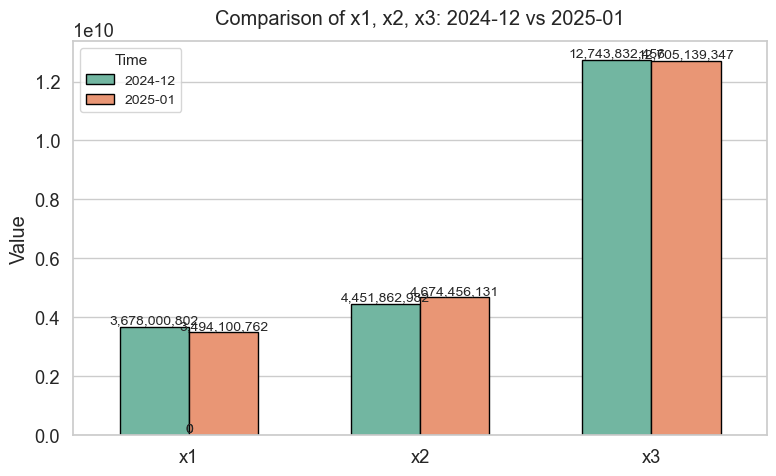

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ====== 构建 DataFrame（便于 seaborn 分组绘图） ======
df = pd.DataFrame({
    'Type': ['x1', 'x2', 'x3', 'x1', 'x2', 'x3'],
    'Value': [x1_2024, x2_2024, x3_2024, x1_2025, x2_2025, x3_2025],
    'Time': ['2024-12', '2024-12', '2024-12', '2025-01', '2025-01', '2025-01']
})

# ====== 美观主题 ======
sns.set_theme(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(8,5))
bar_plot = sns.barplot(
    data=df, 
    x='Type', 
    y='Value', 
    hue='Time',
    palette='Set2',   # 高级柔和配色
    width=0.6,
    edgecolor='black'
)

# ====== 添加数值标签 ======
for p in bar_plot.patches:
    bar_plot.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

# ====== 标题、坐标轴、图例美化 ======
plt.title('Comparison of x1, x2, x3: 2024-12 vs 2025-01', pad=12)
plt.ylabel('Value')
plt.xlabel('')

plt.legend(title='Time', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


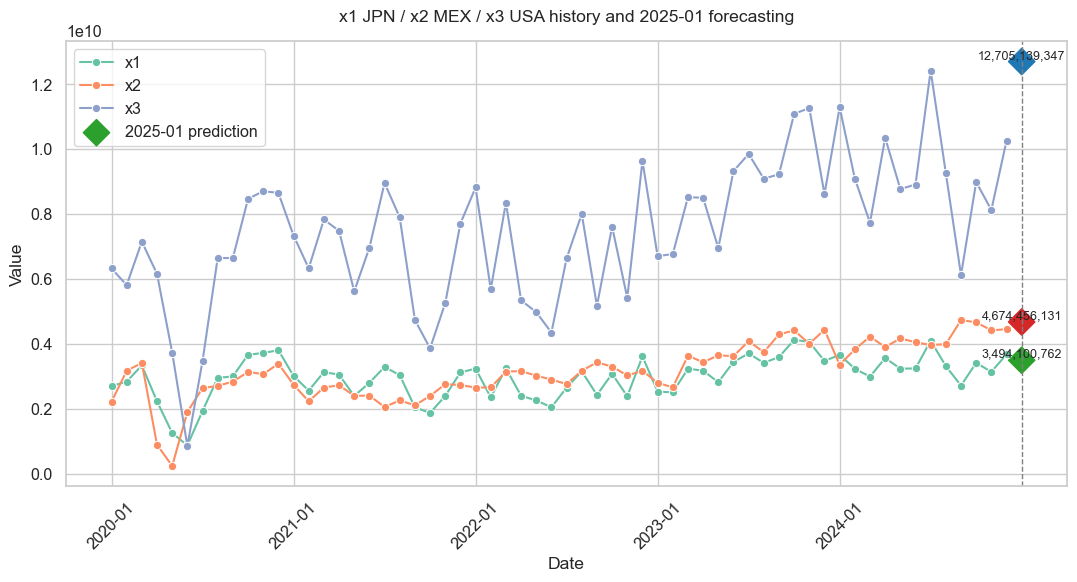

In [32]:
# 历史与预测折线图：x1(日本value), x2(墨西哥value), x3(美国value)
# 定义: Total = x1 / (1 - s_NA_year); x3 = Total - x1 - x2
# 依赖前面读取的 jap, mex 以及已计算的 x1_2025, x2_2025, x3_2025
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

# 北美份额映射 (如有独立文件可替换为读取 CSV)
na_share_map = {2020:0.760, 2021:0.770, 2022:0.780, 2023:0.790, 2024:0.800, 2025:0.810}

# 检查基础数据是否存在
if 'jap' not in globals() or 'mex' not in globals():
    raise RuntimeError('缺少 jap 或 mex 数据，请先运行数据读取单元格。')

# 构造日本历史 x1
jap_hist = jap[['Year','Month','value']].rename(columns={'value':'x1'}).copy()
# 构造墨西哥历史 x2 (若 mex 有多国家则筛选包含 Mex 的行)
mex_base = mex.copy()
if 'Country' in mex_base.columns:
    mex_base = mex_base[mex_base['Country'].astype(str).str.contains('Mex', case=False, na=False)]
mex_hist = mex_base[['Year','Month','value']].rename(columns={'value':'x2'}).copy()

# 合并历史 (月份对齐)，可改 outer 保留所有月份
hist = pd.merge(jap_hist, mex_hist, on=['Year','Month'], how='inner').sort_values(['Year','Month']).reset_index(drop=True)
hist['s_NA'] = hist['Year'].map(na_share_map)
if hist['s_NA'].isna().any(): print('警告: 有年份缺少北美份额映射。')
hist['Total'] = hist['x1'] / (1 - hist['s_NA'])
hist['x3'] = hist['Total'] - hist['x1'] - hist['x2']

# 检查预测值是否存在
if not all(v in globals() for v in ['x1_2025','x2_2025','x3_2025']):
    raise RuntimeError('缺少预测值 x1_2025/x2_2025/x3_2025，请先运行预测或优化单元。')

forecast_row = pd.DataFrame({
    'Year':[2025], 'Month':[1], 'x1':[x1_2025], 'x2':[x2_2025], 's_NA':[na_share_map[2025]]
})
forecast_row['Total'] = forecast_row['x1'] / (1 - forecast_row['s_NA'])
forecast_row['x3'] = x3_2025
hist_all = pd.concat([hist, forecast_row], ignore_index=True)

# 生成日期与长格式
hist_all['Date'] = hist_all['Year'].astype(str) + '-' + hist_all['Month'].astype(str).str.zfill(2)
long_df = hist_all.melt(id_vars=['Year','Month','Date'], value_vars=['x1','x2','x3'], var_name='Type', value_name='Value')
pred_mask = (long_df['Year']==2025) & (long_df['Month']==1)
pred_points = long_df[pred_mask]

sns.set_theme(style='whitegrid', font_scale=1.05)
plt.figure(figsize=(11,6))
hist_lines = long_df[~pred_mask]

sns.lineplot(data=hist_lines, x='Date', y='Value', hue='Type', marker='o', palette='Set2')
plt.scatter(pred_points['Date'], pred_points['Value'], s=180, c=['#2ca02c','#d62728','#1f77b4'], marker='D', label='2025-01 prediction')
for _, r in pred_points.iterrows():
    plt.text(r['Date'], r['Value'], f"{r['Value']:,.0f}", ha='center', va='bottom', fontsize=9)
plt.axvline(x='2025-01', color='gray', linestyle='--', linewidth=1)
plt.title('x1 JPN / x2 MEX / x3 USA history and 2025-01 forecasting', pad=14)
plt.xlabel('Date')
plt.ylabel('Value')
unique_dates = hist_lines['Date'].unique().tolist()
jan_dates = [d for d in unique_dates if d.endswith('-01')]
tick_pos = [unique_dates.index(d) for d in jan_dates]
plt.xticks(tick_pos, jan_dates, rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [19]:
hist_lines.head()

,Year,Month,Date,Type,Value
0,2020,1,2020-01,x1,2.696537e+09
1,2020,2,2020-02,x1,2.835502e+09
2,2020,3,2020-03,x1,3.335811e+09
3,2020,4,2020-04,x1,2.225753e+09
4,2020,5,2020-05,x1,1.252392e+09
